In [15]:
# File processing 
import os

# Data processing 
import numpy as np
from numpy import linalg as LAnumpy
from sklearn.preprocessing import MinMaxScaler

# Data display 
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.legend_handler import HandlerLine2D

# Constants

In [2]:
EMBEDDING_SIZE = 3
TRUSSART_STRUCTURES_PATH = '../data/trussart/hic_matrices/'

# Seeds

# Structure analysis functions

In [3]:
def centralize_numpy(z):
    return z - np.mean(z, axis=0)

In [4]:
def normalize_numpy(z):
    
    norm = LAnumpy.norm(z, 2, axis=1)
    max_norm = np.max(norm, axis=0)
    if max_norm == 0:
        max_norm = 1
    
    return z / max_norm

In [5]:
def centralize_and_normalize_numpy(z):
    
    # Translate
    z = centralize_numpy(z)
    
    # Scale
    z = normalize_numpy(z)
    
    return z

In [6]:
def kabsch_superimposition_numpy(pred_structure, true_structure):
    
    # Centralize and normalize to unit ball
    pred_structure_unit_ball = centralize_and_normalize_numpy(pred_structure)
    true_structure_unit_ball = centralize_and_normalize_numpy(true_structure)
    
    # Rotation (solution for the constrained orthogonal Procrustes problem, subject to det(R) = 1)
    m = np.matmul(np.transpose(true_structure_unit_ball), pred_structure_unit_ball)
    u, s, vh = np.linalg.svd(m)
    
    d = np.sign(np.linalg.det(np.matmul(u, vh)))
    a = np.eye(EMBEDDING_SIZE)
    a[-1,-1] = d
    
    r = np.matmul(np.matmul(u, a), vh)
    
    pred_structure_unit_ball = np.transpose(np.matmul(r, np.transpose(pred_structure_unit_ball)))
    
    return pred_structure_unit_ball, true_structure_unit_ball

In [7]:
def kabsch_distance_numpy(pred_structure, true_structure):
    
    pred_structure_unit_ball, true_structure_unit_ball = kabsch_superimposition_numpy(pred_structure, true_structure)
    
    # Structure comparison
    d = np.mean(np.sum(np.square(pred_structure_unit_ball - true_structure_unit_ball), axis=1))
    
    return d

# Trussart matrices

In [13]:
def min_max_scaling(matrix):
    
    scaler = MinMaxScaler()
    return scaler.fit_transform(matrix)

In [16]:
trussart_matrix_50  = min_max_scaling(np.loadtxt(TRUSSART_STRUCTURES_PATH + '150_TADlike_alpha_50_set0.mat'))
trussart_matrix_100 = min_max_scaling(np.loadtxt(TRUSSART_STRUCTURES_PATH + '150_TADlike_alpha_100_set0.mat'))
trussart_matrix_150 = min_max_scaling(np.loadtxt(TRUSSART_STRUCTURES_PATH + '150_TADlike_alpha_150_set0.mat'))
trussart_matrix_200 = min_max_scaling(np.loadtxt(TRUSSART_STRUCTURES_PATH + '150_TADlike_alpha_200_set0.mat'))

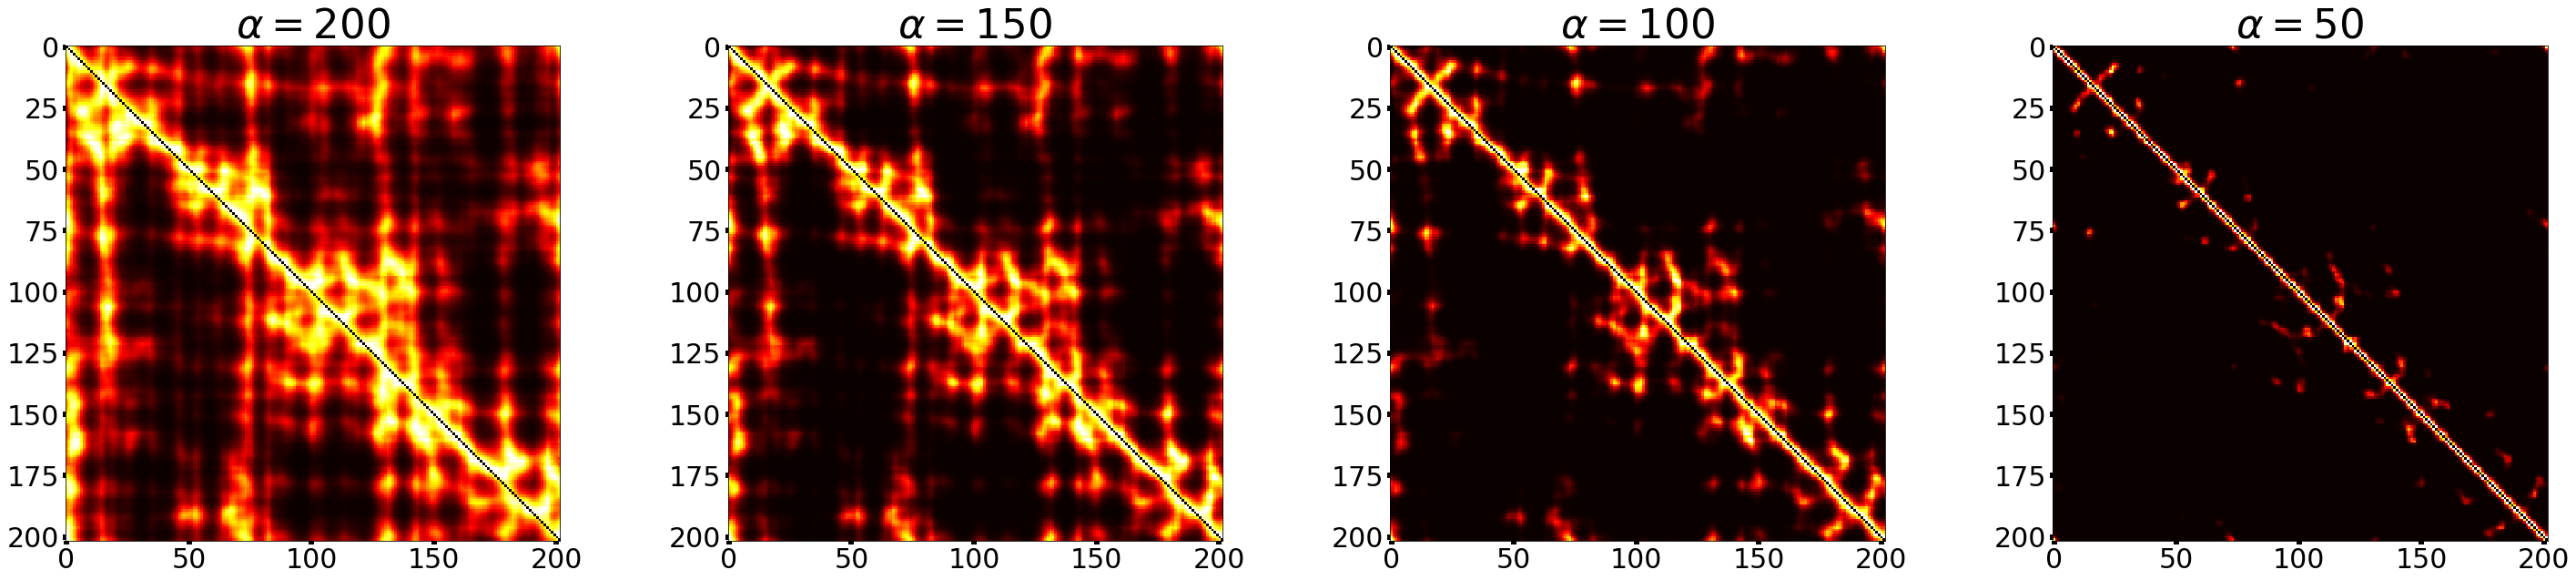

In [50]:
fig, axs = plt.subplots(1, 4, figsize=(50,10))

axs[0].imshow(trussart_matrix_200, cmap='hot', interpolation='nearest')
axs[0].tick_params(axis='both', which='major', labelsize=30, width=6)
axs[0].set_title(r'$\alpha = 200$', size=45)

axs[1].imshow(trussart_matrix_150, cmap='hot', interpolation='nearest')
axs[1].tick_params(axis='both', which='major', labelsize=30, width=6)
axs[1].set_title(r'$\alpha = 150$', size=45)

axs[2].imshow(trussart_matrix_100, cmap='hot', interpolation='nearest')
axs[2].tick_params(axis='both', which='major', labelsize=30, width=6)
axs[2].set_title(r'$\alpha = 100$', size=45)

axs[3].imshow(trussart_matrix_50, cmap='hot', interpolation='nearest')
axs[3].tick_params(axis='both', which='major', labelsize=30, width=6)
axs[3].set_title(r'$\alpha = 50$', size=45)

plt.savefig('trussart_hic_matrices.png')
plt.show()